In [20]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('D:/Desktop One Drive/OneDrive - Asia Pacific University/Desktop/loan.csv')
df.head(3) 
print("Dataset Shape: ",df.shape) 

Dataset Shape:  (577682, 19)


                         Column Name Data Type  Missing Values
0                             loanId    object             256
1                           anon_ssn    object               0
2                       payFrequency    object            1273
3                                apr   float64            3922
4                    applicationDate    object               0
5                         originated      bool               0
6                     originatedDate    object          531638
7                           nPaidOff   float64              24
8                           approved      bool               0
9                           isFunded     int64               0
10                        loanStatus    object             391
11                        loanAmount   float64            2250
12  originallyScheduledPaymentAmount   float64               0
13                             state    object             132
14                          leadType    object         

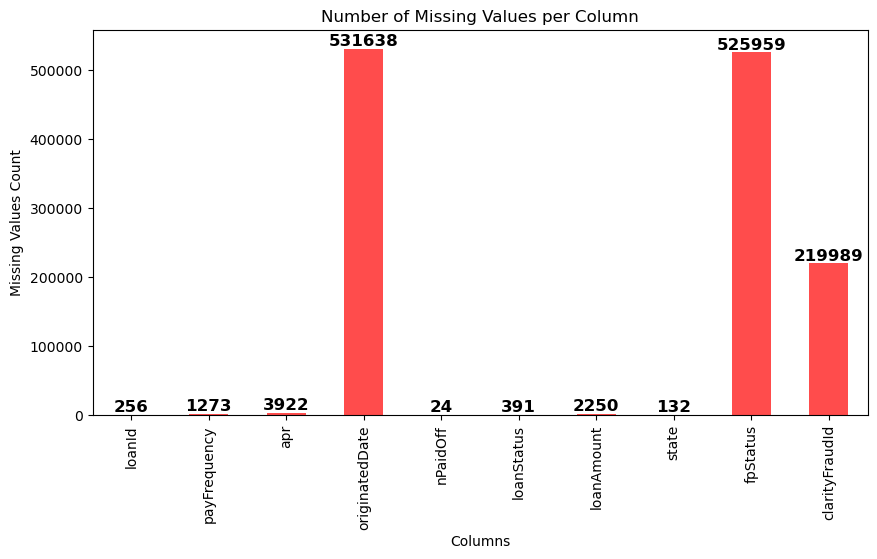

In [4]:

# Create a DataFrame showing column names, data types, and missing value counts
missing_counts = df.isnull().sum()
column_types = df.dtypes

missing_df = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": column_types.values,
    "Missing Values": missing_counts.values
})

print(missing_df)

missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Show only columns with missing values

if not missing_counts.empty:
    plt.figure(figsize=(10, 5))
    bars = missing_counts.plot(kind="bar", color="red", alpha=0.7)

    plt.xlabel("Columns")
    plt.ylabel("Missing Values Count")
    plt.title("Number of Missing Values per Column")

    # Add value labels on top of bars
    for bar in bars.patches:
        plt.text(
            bar.get_x() + bar.get_width() / 2,  
            bar.get_height(),  
            int(bar.get_height()), 
            ha="center", 
            va="bottom",  
            fontsize=12,
            fontweight="bold"
        )

    plt.show()
else:
    print("No missing values found.")



In [5]:


# Count occurrences of each unique loanStatus
loan_status_counts = df['loanStatus'].value_counts().reset_index()

# Rename columns for clarity
loan_status_counts.columns = ['Loan Status', 'Total Occurrences']

# Display the result as a table
print(loan_status_counts)


                    Loan Status  Total Occurrences
0         Withdrawn Application             450984
1                      Rejected              85070
2                 Paid Off Loan              11427
3           External Collection              11334
4                      New Loan               8112
5           Internal Collection               5567
6                 Returned Item               1182
7           CSR Voided New Loan               1026
8           Settlement Paid Off                708
9            Credit Return Void                704
10     Customer Voided New Loan                504
11           Settled Bankruptcy                326
12             Pending Paid Off                169
13         Charged Off Paid Off                160
14      Pending Application Fee                  5
15              Pending Rescind                  4
16          Pending Application                  4
17              Voided New Loan                  2
18                  Charged Off

| **Status**                            | **Category** | **Rationale**                                                                                       |
|---------------------------------------|--------------|------------------------------------------------------------------------------------------------------|
| Paid Off Loan                         | Positive     | Fully repaid under original terms.                                                                   |
| External Collection                   | Negative     | Indicates a default or serious delinquency requiring external collection.                            |
| Internal Collection                   | Negative     | Indicates a default or delinquency requiring internal collection.                                    |
| Returned Item                         | Negative     | Payment returned (e.g., NSF checks), typically a sign of delinquency/default.                        |
| Settlement Paid Off                   | Negative     | Loan was settled for (often) less than the total owed.                                              |
| Settled Bankruptcy                    | Negative     | Bankruptcy resolution is unfavorable (lender doesn’t get the full repayment).                       |
| Charged Off                           | Negative     | Loan is written off as a loss.                                                                      |
| Charged Off Paid Off                  | Negative     | Eventually collected after charge-off—still considered negative in credit risk.                     |
| Withdrawn Application                 | Not Used     | No final repayment outcome.                                                                         |
| Rejected                              | Not Used     | Loan never funded; no repayment or default behavior to learn from.                                  |
| New Loan                              | Not Used     | Still active; outcome unknown.                                                                       |
| CSR Voided New Loan                   | Not Used     | Loan never went through to final performance.                                                       |
| Credit Return Void                    | Not Used     | No final performance (voided transaction).                                                          |
| Customer Voided New Loan              | Not Used     | Loan never funded.                                                                                  |
| Customver Voided New Loan (typo)      | Not Used     | Same as above (typo in data).                                                                       |
| Pending Paid Off                      | Not Used     | Payment outcome not yet finalized.                                                                  |
| Pending Application Fee               | Not Used     | Still open.                                                                                         |
| Pending Rescind                       | Not Used     | Still open or canceled before funding.                                                              |
| Pending Application                   | Not Used     | Still under review; no performance outcome.                                                         |
| Settlement Pending Paid Off           | Not Used     | Not a finalized settlement.                                                                         |


In [6]:
import pandas as pd
import numpy as np

# 1. Define sets of statuses
positive_statuses = {"Paid Off Loan"}
negative_statuses = {
    "External Collection", 
    "Internal Collection",
    "Returned Item",
    "Settlement Paid Off",
    "Settled Bankruptcy",
    "Charged Off",
    "Charged Off Paid Off"
}

# 2. Drop rows where 'loanStatus' is NaN
df.dropna(subset=['loanStatus'], inplace=True)

# 3. Filter out "Not Used" statuses, keep only final ones
allowed_statuses = positive_statuses.union(negative_statuses)
df = df[df['loanStatus'].isin(allowed_statuses)]

# 4. Create the new risk indicator (binary label)
df['risk_indicator'] = np.where(
    df['loanStatus'].isin(positive_statuses), 
    1,  # Positive outcome
    0   # Negative outcome
)


df.drop(columns='loanStatus', inplace=True)

# Now df has:
#   - risk_indicator (1 = positive, 0 = negative)
#   - loanStatus removed from the final features



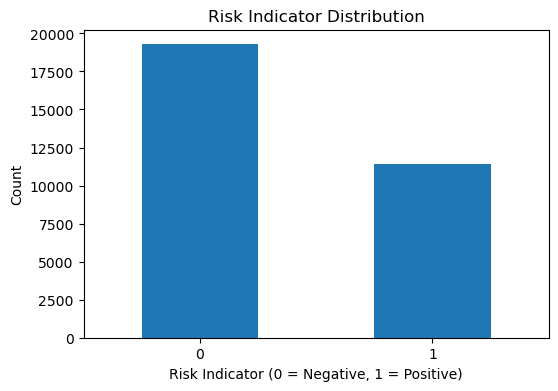

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
risk_counts = df['risk_indicator'].value_counts()

# Plot the distribution
plt.figure(figsize=(6,4))  # Optional: adjust figure size as needed
risk_counts.plot(kind='bar')
plt.title("Risk Indicator Distribution")
plt.xlabel("Risk Indicator (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()


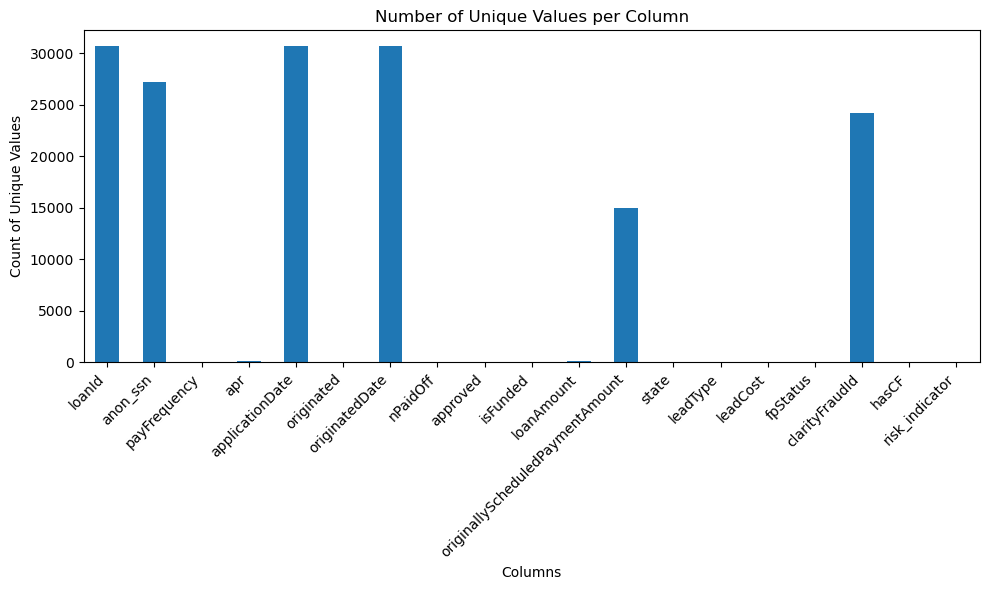

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate number of unique values per column
unique_counts = df.nunique()

# Create a bar plot
plt.figure(figsize=(10, 6))
unique_counts.plot(kind='bar')
plt.xlabel("Columns")
plt.ylabel("Count of Unique Values")
plt.title("Number of Unique Values per Column")
plt.xticks(rotation=45, ha='right')  # Rotate column names for clarity
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

crosstab = pd.crosstab(df['fpStatus'], df['risk_indicator'])
print(crosstab)


risk_indicator      0      1
fpStatus                    
Cancelled          48    196
Checked         13854  10962
No Payments         1      0
Rejected         5240    219
Returned            1      0
Skipped           122     50


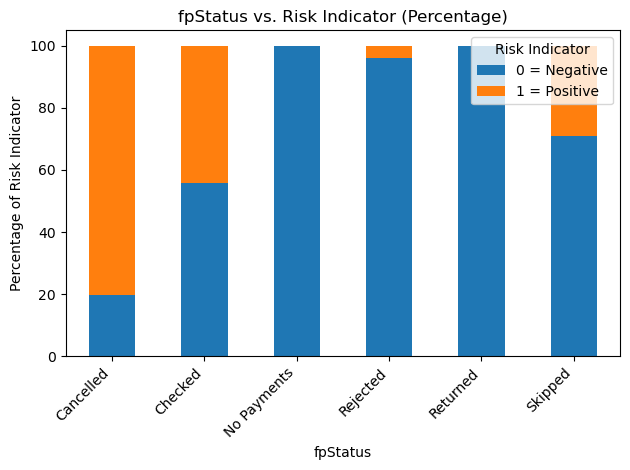

In [10]:
import matplotlib.pyplot as plt

# Convert counts to row-wise percentages
crosstab_percent = crosstab.apply(lambda x: x / x.sum() * 100, axis=1)

crosstab_percent.plot(kind='bar', stacked=True)

plt.title("fpStatus vs. Risk Indicator (Percentage)")
plt.xlabel("fpStatus")
plt.ylabel("Percentage of Risk Indicator")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Risk Indicator", labels=["0 = Negative", "1 = Positive"])
plt.tight_layout()
plt.show()


# Columns to Drop




unique identifier
1. loadId = loanId – This is a unique loan identifier with no predictive value​

2. anon_ssn = anonymized social security number, unique to each individual. Including it could leak identity information

3. clarityFraidId = A unique underwriting ID for linking to the clarity_underwriting_variables data​

Data leakage
1. originated = A boolean flag indicating if the loan was originated (the first step of underwriting)​. This is not known at the time of application. Including it would leak information about the underwriting decision.

2. originatedDate = only known after the loan is originated. Same as originated

4. isFunded = Whether or not a loan is ultimately funded. It would not be known at the initial decision stage.

5. fpStatus = Result of the first payment of the loan. it only exists once the loan is funded and a payment attempt is made. 

6. approved = A flag indicating if the loan was approved. Dropping approved to avoid data leakage.

In [11]:
# Columns to drop (unique identifiers or data leakage)
columns_to_drop = [
    "loanId",          # Unique identifier
    "anon_ssn",        # Anonymized SSN (unique)
    "clarityFraudId",  # Likely another unique ID
    "originated",      # Future decision (data leakage)
    "originatedDate",  # Known only after loan is originated
    "nPaidOff",        # Not known at application time
    "isFunded",        # Future data
    "fpStatus",        # Indicates final/after-the-fact statuses (data leakage)
    "approved"
]

# Drop them from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Confirm they've been removed
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['payFrequency', 'apr', 'applicationDate', 'loanAmount', 'originallyScheduledPaymentAmount', 'state', 'leadType', 'leadCost', 'hasCF', 'risk_indicator']


In [12]:
null_counts = df.isnull().sum()
print(null_counts)

payFrequency                        1
apr                                 0
applicationDate                     0
loanAmount                          0
originallyScheduledPaymentAmount    0
state                               0
leadType                            0
leadCost                            0
hasCF                               0
risk_indicator                      0
dtype: int64


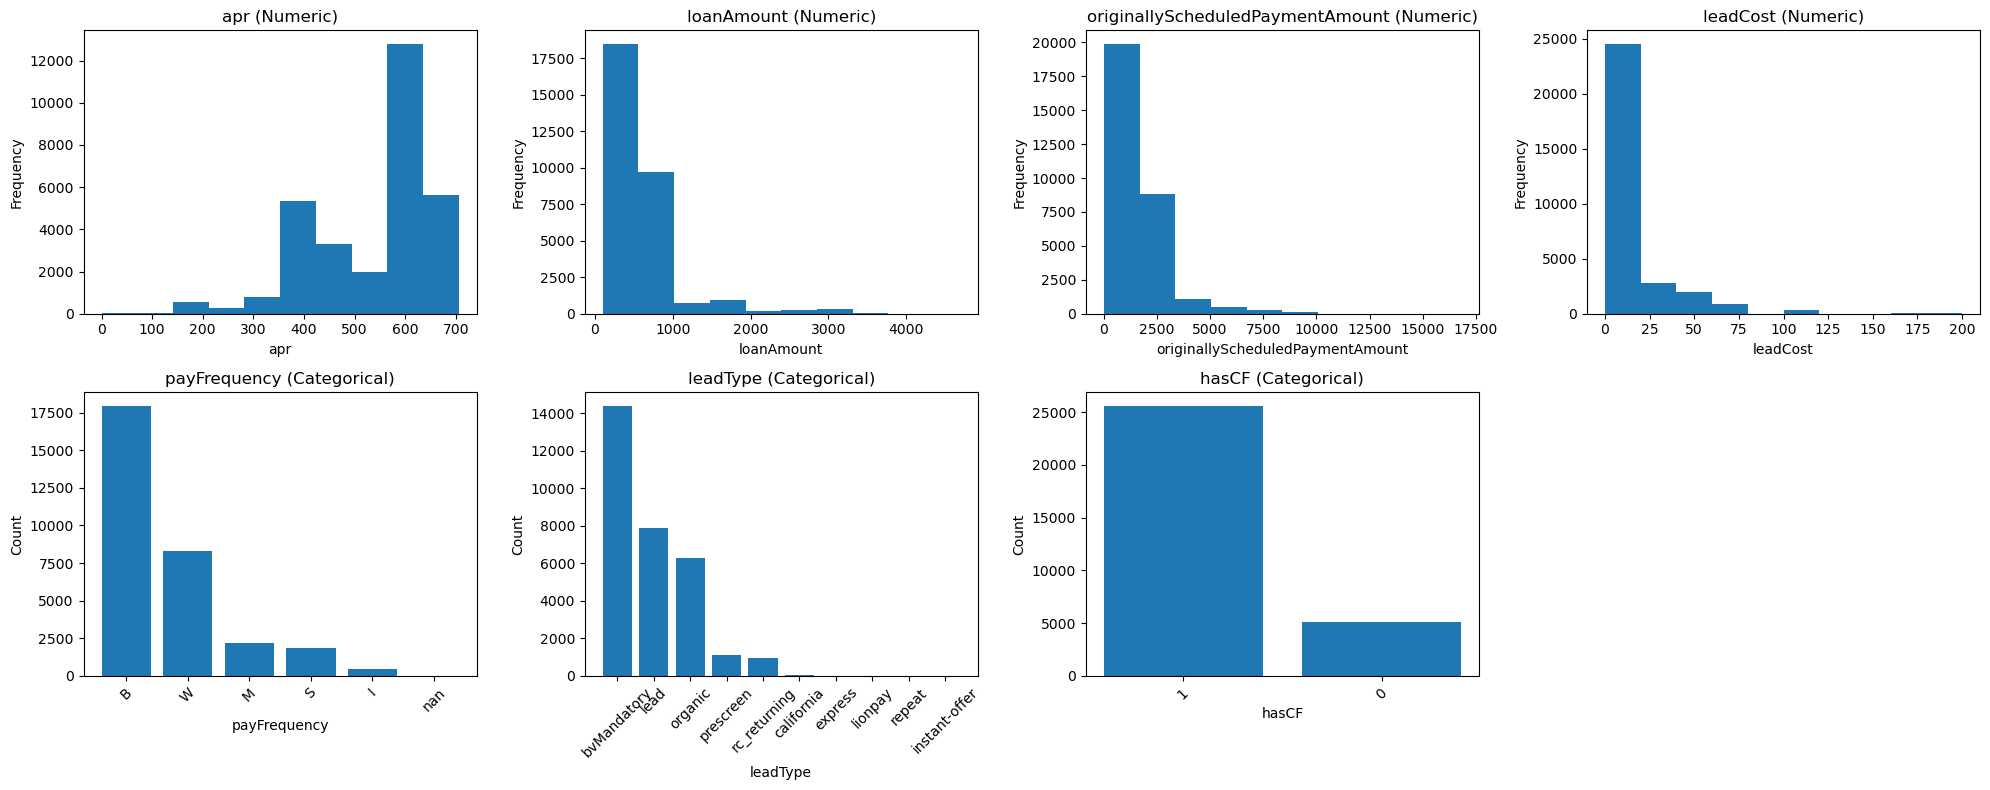

In [13]:
import matplotlib.pyplot as plt

def plot_feature_distributions(df, numeric_cols, categorical_cols):
    """
    Creates a grid of subplots showing distributions of numeric and categorical columns.
    Numeric -> Histogram
    Categorical -> Bar chart (value counts)
    """
    # Determine the total number of features
    total_features = len(numeric_cols) + len(categorical_cols)
    
    # Decide grid size: for example, 3 columns per row
    ncols = 4
    nrows = (total_features // ncols) + (1 if total_features % ncols else 0)
    
    # Create the figure and axes
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))
    axes = axes.flatten()  # Flatten so we can iterate in a single loop
    
    # Plot numeric columns
    idx = 0
    for col in numeric_cols:
        ax = axes[idx]
        ax.hist(df[col].dropna())  # Drop NaNs to avoid errors
        ax.set_title(f"{col} (Numeric)")
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
        idx += 1

    # Plot categorical columns
    for col in categorical_cols:
        ax = axes[idx]
        # Get counts and plot a bar chart
        counts = df[col].value_counts(dropna=False)
        ax.bar(counts.index.astype(str), counts.values)
        ax.set_title(f"{col} (Categorical)")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=45)
        idx += 1
    
    # If there are empty subplots (if total_features < nrows*ncols), hide them
    while idx < len(axes):
        axes[idx].set_visible(False)
        idx += 1
    
    plt.tight_layout()
    plt.show()

numeric_columns = ["apr", "loanAmount", "originallyScheduledPaymentAmount", "leadCost"]
categorical_columns = ["payFrequency", "leadType", "hasCF"]

plot_feature_distributions(df, numeric_columns, categorical_columns)


In [14]:
# Calculate the mode
mode_value = df['payFrequency'].mode()[0]

# Assign the filled result back to the column
df['payFrequency'] = df['payFrequency'].fillna(mode_value)

# Check
print(df['payFrequency'].isnull().sum())



0


 Here we already get the clean data for the model

Start to encode the categorical columns

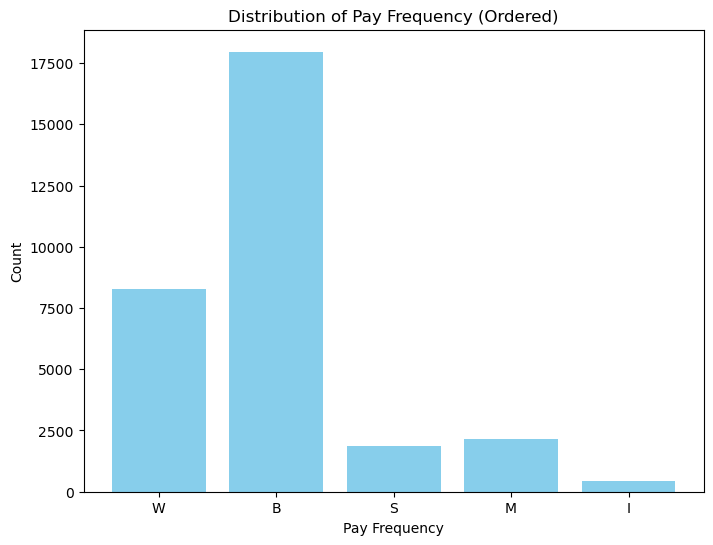

   payFrequency
1             B
47            S
54            B
64            W
83            B
    payFrequency
1              1
47             2
54             1
64             0
83             1


In [15]:
import matplotlib.pyplot as plt

# Define the mapping for payFrequency
mapping = {
    'W': 0,  # Weekly
    'B': 1,  # Bi-weekly
    'S': 2,  # Semi-monthly
    'M': 3,  # Monthly
    'I': 4   # Irregular
}

# Define the order for plotting
order = ['W', 'B', 'S', 'M', 'I']

# Calculate counts and reindex to ensure the desired order
pay_freq_counts = df['payFrequency'].value_counts().reindex(order)

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(pay_freq_counts.index, pay_freq_counts.values, color='skyblue')
plt.xlabel("Pay Frequency")
plt.ylabel("Count")
plt.title("Distribution of Pay Frequency (Ordered)")
plt.show()

print(df[['payFrequency']].head())
df['payFrequency'] = df['payFrequency'].map(mapping)
print(df[['payFrequency']].head())


State Analysis

In [16]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1) Aggregate your data by state
#    - risk_ratio = average of 'risk_indicator' (since it's 0/1)
#    - total_loans = count of loans
#    - avg_loan_amount = mean of 'loanAmount'
state_summary = df.groupby('state', as_index=False).agg(
    risk_ratio=('risk_indicator', 'mean'),     # fraction that are risk_indicator=1
    total_loans=('loanAmount', 'count'),       # total number of loans
    avg_loan_amount=('loanAmount', 'mean')     # average loan amount
)

# 2) Create a 1-row, 3-column layout
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=["Risk Ratio by State", "Total Loans by State", "Avg Loan Amount by State"],
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}, {"type": "choropleth"}]]
)

# ------------------------
# Trace 1: Risk Ratio
# ------------------------
trace1 = go.Choropleth(
    locations=state_summary['state'],
    z=state_summary['risk_ratio'],
    locationmode="USA-states",
    colorscale="Reds",
    colorbar_title="Risk Ratio",
    geo='geo',
    # Move the colorbar a bit to avoid overlapping the map
    colorbar=dict(x=0.27, y=0.5, len=0.75)
)
fig.add_trace(trace1, row=1, col=1)

# ------------------------
# Trace 2: Total Loans
# ------------------------
trace2 = go.Choropleth(
    locations=state_summary['state'],
    z=state_summary['total_loans'],
    locationmode="USA-states",
    colorscale="Blues",
    colorbar_title="Total Loans",
    geo='geo2',
    colorbar=dict(x=0.62, y=0.5, len=0.75)
)
fig.add_trace(trace2, row=1, col=2)

# ------------------------
# Trace 3: Avg Loan Amount
# ------------------------
trace3 = go.Choropleth(
    locations=state_summary['state'],
    z=state_summary['avg_loan_amount'],
    locationmode="USA-states",
    colorscale="Greens",
    colorbar_title="Avg Loan ($)",
    geo='geo3',
    colorbar=dict(x=0.97, y=0.5, len=0.75)
)
fig.add_trace(trace3, row=1, col=3)

# 3) Final layout adjustments
fig.update_layout(
    title_text="State-level Loan Metrics (Your Dataset)",
    geo=dict(scope='usa'),   # left subplot
    geo2=dict(scope='usa'),  # middle subplot
    geo3=dict(scope='usa'),  # right subplot
    height=550
)
fig.show()


# -----------------------------
# B) CENSUS DATA (df_census)
# -----------------------------
CENSUS_API_KEY = "230efe0995ced4c72653b2a7d280678dab929534"  # replace with your actual key

variables = ["NAME", "B19013_001E", "B23025_003E", "B23025_005E"]
url = (
    "https://api.census.gov/data/2016/acs/acs1"
    f"?get={','.join(variables)}"
    "&for=state:*"
    f"&key={CENSUS_API_KEY}"
)

response = requests.get(url)
if response.status_code != 200:
    raise Exception(f"Request failed: {response.status_code} - {response.text}")

data = response.json()
df_census = pd.DataFrame(data[1:], columns=data[0])

df_census.rename(columns={
    "NAME": "state_name",
    "B19013_001E": "median_income",
    "B23025_003E": "labor_force",
    "B23025_005E": "unemployed",
    "state": "state_fips"
}, inplace=True)

# Convert to numeric
df_census["median_income"] = pd.to_numeric(df_census["median_income"], errors="coerce")
df_census["labor_force"]   = pd.to_numeric(df_census["labor_force"], errors="coerce")
df_census["unemployed"]    = pd.to_numeric(df_census["unemployed"], errors="coerce")

df_census.dropna(subset=["median_income", "labor_force", "unemployed"], inplace=True)
df_census["unemployment_rate"] = df_census["unemployed"] / df_census["labor_force"] * 100

# Map FIPS -> state abbrev
fips_to_abbrev = {
    '01': 'AL','02': 'AK','04': 'AZ','05': 'AR','06': 'CA','08': 'CO','09': 'CT','10': 'DE','11': 'DC',
    '12': 'FL','13': 'GA','15': 'HI','16': 'ID','17': 'IL','18': 'IN','19': 'IA','20': 'KS','21': 'KY',
    '22': 'LA','23': 'ME','24': 'MD','25': 'MA','26': 'MI','27': 'MN','28': 'MS','29': 'MO','30': 'MT',
    '31': 'NE','32': 'NV','33': 'NH','34': 'NJ','35': 'NM','36': 'NY','37': 'NC','38': 'ND','39': 'OH',
    '40': 'OK','41': 'OR','42': 'PA','44': 'RI','45': 'SC','46': 'SD','47': 'TN','48': 'TX','49': 'UT',
    '50': 'VT','51': 'VA','53': 'WA','54': 'WV','55': 'WI','56': 'WY'
}

df_census["state_abbrev"] = df_census["state_fips"].map(fips_to_abbrev)

# Now we plot 2-subplots for median_income and unemployment_rate
fig_census = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Median Income (2016)", "Unemployment Rate (2016)"],
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]]
)

# Left: Median Income
trace_left = go.Choropleth(
    locations=df_census["state_abbrev"],
    z=df_census["median_income"],
    locationmode="USA-states",
    colorscale="Blues",
    colorbar_title="Median ($)",
    geo="geo",
    text=df_census["state_name"],
    hovertemplate="<b>%{text}</b><br>Median Income: $%{z}<extra></extra>",
    colorbar=dict(x=0.35, y=0.6, len=0.75)
)
fig_census.add_trace(trace_left, row=1, col=1)

# Right: Unemployment Rate
trace_right = go.Choropleth(
    locations=df_census["state_abbrev"],
    z=df_census["unemployment_rate"],
    locationmode="USA-states",
    colorscale="Reds",
    colorbar_title="Unemp. Rate (%)",
    geo="geo2",
    text=df_census["state_name"],
    hovertemplate="<b>%{text}</b><br>Unemployment: %{z:.2f}%<extra></extra>",
    colorbar=dict(x=1.0, y=0.6, len=0.75)
)
fig_census.add_trace(trace_right, row=1, col=2)

fig_census.update_layout(
    title="2016 State-Level Economic Indicators (Census)",
    geo=dict(scope="usa"),
    geo2=dict(scope="usa"),
    height=600
)

fig_census.show()


In [17]:
# 1) Define region mapping
region_map = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 'RI': 'Northeast',
    'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    
    # Midwest
    'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest',
    'ND': 'Midwest', 'SD': 'Midwest',
    
    # South
    'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South', 'NC': 'South',
    'SC': 'South', 'VA': 'South', 'WV': 'South', 'AL': 'South', 'KY': 'South',
    'MS': 'South', 'TN': 'South', 'AR': 'South', 'LA': 'South', 'OK': 'South',
    'TX': 'South', 'DC': 'South',
    
    # West
    'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West',
    'NM': 'West', 'UT': 'West', 'WY': 'West', 'AK': 'West', 'CA': 'West',
    'HI': 'West', 'OR': 'West', 'WA': 'West'
}

# 2) Define numeric codes
region_code_map = {
    'Northeast': 1,
    'Midwest': 2,
    'South': 3,
    'West': 4
}

# 3) Add region columns in df_census
df_census['region_name'] = df_census['state_abbrev'].map(region_map)
df_census['region_code'] = df_census['region_name'].map(region_code_map)


In [18]:
import plotly.graph_objects as go

fig_region = go.Figure(
    go.Choropleth(
        locations=df_census["state_abbrev"],
        z=df_census["region_code"],
        locationmode="USA-states",
        zmin=1,
        zmax=4,
        colorscale=[
            [0.0, "purple"],
            [0.25, "purple"],
            [0.25, "blue"],
            [0.50, "blue"],
            [0.50, "green"],
            [0.75, "green"],
            [0.75, "red"],
            [1.0, "red"]
        ],
        colorbar=dict(
            title="Region Code",
            tickmode="array",
            tickvals=[1, 2, 3, 4],
            ticktext=["1: Northeast", "2: Midwest", "3: South", "4: West"],
            lenmode="fraction",
            len=0.75,
            x=1.0,
            y=0.5
        ),
        text=df_census["region_name"],
        hovertemplate="<b>%{location}</b><br>Region: %{text}<extra></extra>"
    )
)

fig_region.update_layout(
    title="U.S. Census Regions (Numeric Encoding)",
    geo=dict(scope="usa"),
    height=600
)

fig_region.show()


In [19]:
# Convert your state abbreviations to uppercase if needed
df['state'] = df['state'].str.upper()

# Create region_code directly for each row in df
df['region_code'] = df['state'].map(lambda x: region_code_map.get(region_map.get(x), None))

# Print unique region codes to confirm
print("Unique region codes in df:", df['region_code'].unique())

# Drop original 'state' column
df.drop(columns=['state'], inplace=True)



Unique region codes in df: [4 2 3 1]
